In [199]:
# import nesseary libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from kneed import KneeLocator
from scipy import stats


In [202]:
# import the dataset
df = pd.read_csv("web_data.csv", encoding="unicode_escape")

# view the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [203]:
result = df[df['CustomerID']== 17850.0]
result

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2/10/2011 14:38,1.06,17850.0,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2/10/2011 14:38,2.75,17850.0,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom


# build RFM model
#recency (how long ago they made a purchase)
#frequency (how often they make purchases)
#monetary value (how much money they spend)

In [204]:
# Create Sales column
#df['Sales']= df['Quantity']* df['UnitPrice']
#df.head()

In [205]:
#NOW = dt.datetime(2011,12,10)
#Convert ORDERDATE to datetime format.
#df['Date']= pd.to_datetime(df['InvoiceDate'])

In [206]:
#temp=['CustomerID', 'InvoiceNo', 'Date', 'Sales']
#RFM_data=df[temp]
#RFM_data.shape

In [207]:
# RFM Table
#RFM_table=RFM_data.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, # Recency
                                                #'InvoiceNo': lambda x: len(x.unique()), # Frequency
                                                #'Sales': lambda x: x.sum()})    # Monetary 

#RFM_table['InvoiceNo'] = RFM_table['Date'].astype(int)

#RFM_table.rename(columns={'Date': 'recency', 
                         #'InvoiceNo': 'frequency',
                         #'Sales': 'monetary_value'}, inplace=True)
#RFM_table.head(100)

In [226]:
## calculating recency
# convert date column to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate'])
# Determine the reference date as the most recent date in the dataset
reference_date = df['Date'].max()

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [209]:
# Calculate recency for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['Date']).dt.days
recency_df.head()

,CustomerID,Date,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [210]:
#  merge it to main dataset
rec_df = df.merge(recency_df, on='CustomerID')
rec_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_x,Date_y,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,301
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,301
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,301
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,301
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,301


In [211]:
# calculate frequency 
freq = df.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

In [212]:
# merge this dataframe 
rec_freq_df = df_freq.merge(rec_df,on='CustomerID')
rec_freq_df.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date_x,Date_y,Recency
0,12346.0,2,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,2011-01-18 10:17:00,325
1,12346.0,2,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,United Kingdom,2011-01-18 10:17:00,2011-01-18 10:17:00,325
2,12347.0,182,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,2011-12-07 15:52:00,1
3,12347.0,182,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,2011-12-07 15:52:00,1
4,12347.0,182,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,2011-12-07 15:52:00,1


In [213]:
# calculate each user’s monetary
rec_freq_df['Sales'] = rec_freq_df['Quantity']*rec_freq_df['UnitPrice']
money_df = rec_freq_df.groupby('CustomerID')['Sales'].sum()
money_df = pd.DataFrame(money_df).reset_index()
money_df.columns = ['CustomerID','monetary_value']
money_df.head()

,CustomerID,monetary_value
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [214]:
# merge with the main dataframe
rfm_df = money_df.merge(rec_freq_df,on='CustomerID')
rfm_df.head()

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date_x,Date_y,Recency,Sales
0,12346.0,0.0,2,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,2011-01-18 10:17:00,325,77183.6
1,12346.0,0.0,2,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,United Kingdom,2011-01-18 10:17:00,2011-01-18 10:17:00,325,-77183.6
2,12347.0,4310.0,182,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,2011-12-07 15:52:00,1,25.2
3,12347.0,4310.0,182,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,2011-12-07 15:52:00,1,17.0
4,12347.0,4310.0,182,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,2011-12-07 15:52:00,1,39.0


In [215]:
# select only the columns required to build the customer segmentation model
final_df = rfm[['CustomerID','recency','frequency','monetary_value']]
final_df.head()

,CustomerID,recency,frequency,monetary_value
0,12346.0,48.0,1,189248.25
1,12347.0,6.0,31,1246.73
2,12347.0,6.0,31,1246.73
3,12347.0,6.0,31,1246.73
4,12347.0,6.0,31,1246.73


recency: 


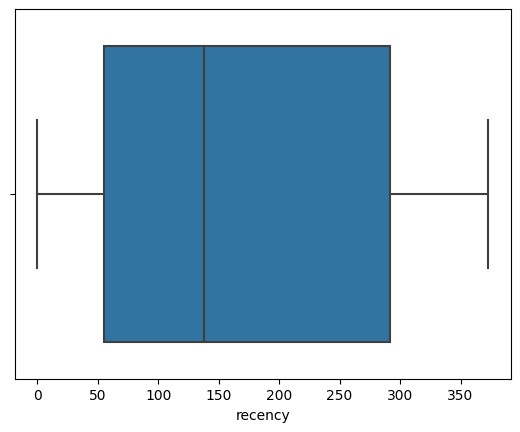

frequency: 


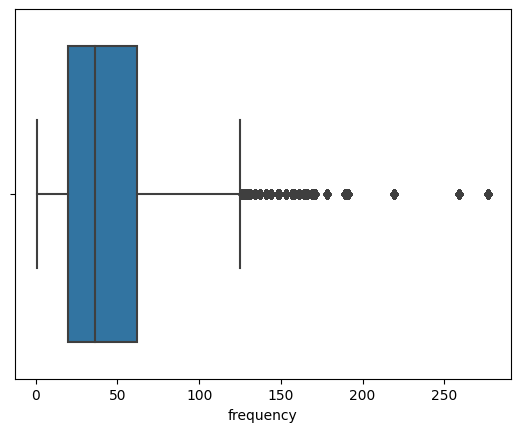

monetary_value: 


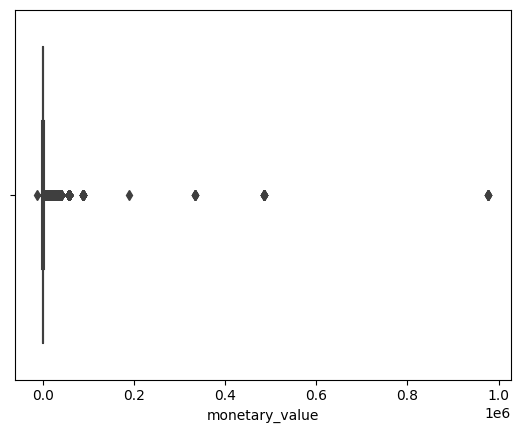

In [216]:
# Check outlier
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [225]:
#  removing outlier
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
# remove outliers
# Calculate Z-Scores for each column
z_scores = stats.zscore(new_df)
# Define a Z-Score threshold (e.g., 3 standard deviations)
abs_z_scores = np.abs(z_scores)
# Create a boolean mask to identify outliers
filtered_entries = (abs_z_scores < 3).all(axis=1)
# Apply the mask to remove outliers
new_df = new_df[filtered_entries]

new_df.head(100)


,recency,frequency,monetary_value
1,6.0,31,1246.73
2,6.0,31,1246.73
3,6.0,31,1246.73
4,6.0,31,1246.73
5,6.0,31,1246.73
...,...,...,...
96,355.0,73,1618.81
97,355.0,73,1618.81
98,355.0,73,1618.81
99,355.0,73,1618.81


In [218]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

Text(0, 0.5, 'Inertia')

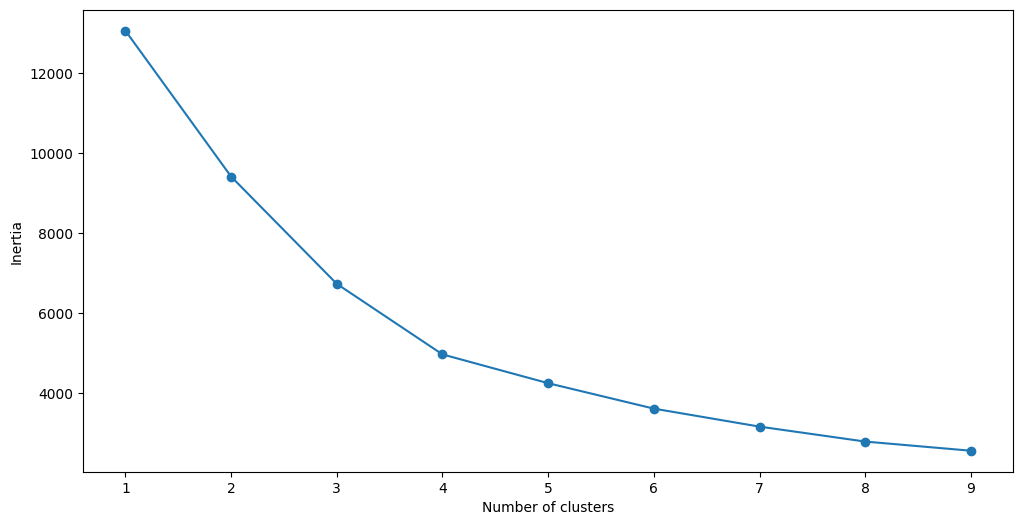

In [219]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [220]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

c:\Users\Lucy Wu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [221]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))
#The silhouette coefficient of this model is 0.44, indicating reasonable cluster separation.

0.4360722849503388


In [222]:
# Segmentation Model Interpretation and Visualization
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred




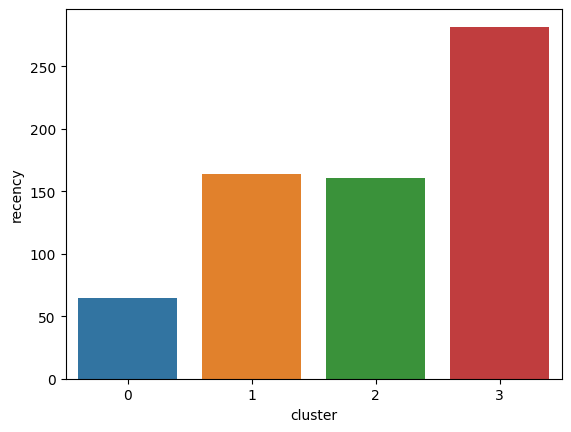

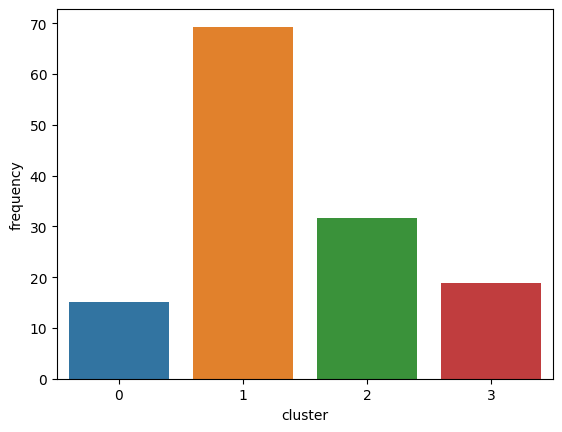

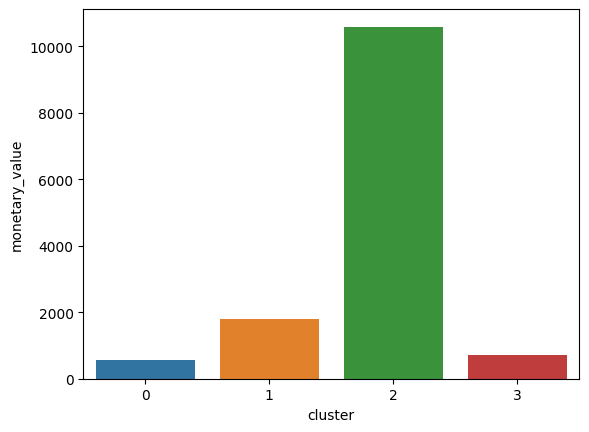

In [223]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [224]:
avg_df.head()

,cluster,recency,frequency,monetary_value
0,0,64.851028,15.084767,569.562405
1,1,163.389796,69.297959,1806.630571
2,2,160.630137,31.602740,10587.056575
3,3,281.600569,18.832978,728.469339
